# Taller *Fundamentos* de machine learning

Preparación

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt


scopus = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/scopus-papers.csv")
scopus['Author Keywords'].head()

0    Geo-location data; Human mobility; Resilience;...
1    Language analysis; LIWC; Moral foundations the...
2    Gravity model; Media ecosystem; News spreading...
3    Centrality measures; Community Structure; Infl...
4    Cholesterol; Diabetes; Digital purchase record...
Name: Author Keywords, dtype: object

In [15]:
scopus.shape

(1902, 23)

Descripción del problema

La columna 'Author Keywords' contiene las palabras claves de un conjunto de artículos extraído de Scopus. Estas palabras clave son consideradas descriptores del contenido del artículo, por lo que su análisis permite establecer el contenido conceptual de un cuerpo de literatura. De ahí que muchas técnicas de estadística y aprendizaje de máquinas sean empleadas para su análisis.

En este ejercicio, usted empleará los conocimientos adquiridos en el curso para construir un gráfico análitico comúnmente usado para el análisis comparativo de palabras que representan conceptos. Véase por ejemplo https://tlab.it/en/allegati/help_en_online/msvd.htm 



1. Determine las 100 palabras clave más frecuentes. Utilice las funciones de Pandas para manipular el archivo, realizar el conteo a partir de los datos de la columna 'Author Keywords'. Como evidencia de este punto imprima las primeras y las últimas 5 palabras de este grupo de 100 palabras, y su frecuencia.

In [16]:
# Se valida el contenido de scopus
print(scopus['Author Keywords'].head(3))

0    Geo-location data; Human mobility; Resilience;...
1    Language analysis; LIWC; Moral foundations the...
2    Gravity model; Media ecosystem; News spreading...
Name: Author Keywords, dtype: object


In [17]:
#  POR BIGRAMAS
# Copiamos la columna Author Keywords en un DF nuevo
df_keyword = scopus[['Author Keywords']].copy()
# Reemplazamos '.;' espacio por ';'
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.replace('\.;',';')
# Reemplazamos '/' espacio por '_'
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.replace('/','_')
# Reemplazamos '(' espacio por '_'
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.replace('(','_')
# Reemplazamos ')' espacio por '_'
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.replace(')','_')
# Reemplazamos ',' coma por '_'
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.replace(',','_')
# Eliminamos los nulos
df_keyword = df_keyword.dropna()
# Convertimos a Mayuscula
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.upper()
# Split por ';' a la columna Author Keywords y eliminacion de duplicados por linea
for linea in df_keyword.index:
    df_keyword['Author Keywords'][linea] = df_keyword['Author Keywords'][linea].split(';')
    df_keyword['Author Keywords'][linea] = pd.unique(df_keyword['Author Keywords'][linea])
# Explode a la columna Author Keywords
df_keyword = df_keyword.explode("Author Keywords")
# Eliminamos espacios en blanco al inicio
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.strip()
# Reemplazamos ' ' espacio por '_'
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.replace(' ','_')
# Reemplazamos '-' guion medio por '_'
df_keyword['Author Keywords'] = df_keyword['Author Keywords'].str.replace('-','_')
# Hacemos el conteo
df_keyword = df_keyword.groupby('Author Keywords').size()
df_keyword.columns = ["Author Keywords","Frecuencia"]
# Ordenamos de Mayor a menor
df_keyword = df_keyword.sort_values(ascending=False)
# Extraemos los 100 primeros registros
df_keyword = df_keyword.head(100)
# Imprimimos el resultado
print (type(df_keyword))
# 5 palabras más frecuentes
print(df_keyword.head(5))
# 5 palabras menos frecuentes
print(df_keyword.tail(5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.series.Series'>
Author Keywords
BIG_DATA              169
DATA_MINING           135
MACHINE_LEARNING       57
CLUSTERING             41
BIG_DATA_ANALYTICS     37
dtype: int64
Author Keywords
HIGH_PERFORMANCE_COMPUTING       6
URBAN_FORM                       6
NETWORK_ANALYSIS                 6
NETWORK                          6
DATA_ACQUISITION_AND_CLEANING    6
dtype: int64


2. Construya la matriz documento-termino. Las filas son los documentos y las columnas son las 100 palabras clave más frecuentes. La matriz debería estar poblada de unos y ceros. Debe eliminar las filas que corresponden a los documentos que no usan ninguna de las 100 palabras clave más frecuentes. Como evidencia verifique que la suma de las columnas de la matriz documento-término es igual a la frecuencia computada para cada palabra en el punto anterior.

In [18]:
# Creamos una copia de las 100 palabras con más frecuencia
df_palabras = df_keyword.copy()
# Copiamos la columna Author Keywords en un DF nuevo
df_dctosfull = scopus['Author Keywords']
# Reemplazamos ';.' espacio por ';'
df_dctosfull = df_dctosfull.str.replace('\.;',';')
# Reemplazamos '/' espacio por '_'
df_dctosfull = df_dctosfull.str.replace('/','_')
# Reemplazamos '(' espacio por '_'
df_dctosfull = df_dctosfull.str.replace('(','_')
# Reemplazamos ')' espacio por '_'
df_dctosfull = df_dctosfull.str.replace(')','_')
# Reemplazamos ',' coma por '_'
df_dctosfull = df_dctosfull.str.replace(',','_')
# Eliminamos los nulos
df_dctosfull = df_dctosfull.dropna()
# Convertimos a Mayuscula
df_dctosfull = df_dctosfull.str.upper()

# Creamos una nueva lista de dctos y limpiamos
lst_dctosfull = []
for palabra in df_dctosfull:
  palabrainner = str(palabra).replace('; ',',')  
  palabrainner = str(palabrainner).replace(" ","_")
  palabrainner = str(palabrainner).replace("-","_")
  palabrainner = str(palabrainner).replace("–","_")
  lst_dctosfull.append(palabrainner)


In [19]:
# Creamos el transformador
#pd.set_option("display.notebook_repr_html", False)
vectorizer = CountVectorizer(
        lowercase=False,
        preprocessor=None,
        tokenizer=None,
        stop_words="english",
        token_pattern=r"(?u)\b\w\w+\b",        
        #token_pattern=r"(?u)\b\w\w+\W\w+\b",        
        max_df=1.0,
        min_df=1,
        max_features=None,
        binary=True        
)

#Creamos la Matriz documento-termino
vectorizer.fit(lst_dctosfull)
X = vectorizer.transform(lst_dctosfull)

# Creamos el DF Respuesta
res = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names(),
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [20]:
# Validacion de la matriz documento-termino
print(type(res))
test3 = res.sum().sort_values(ascending=False)
test4 = test3.head(100)
test4.tail(5)

<class 'pandas.core.frame.DataFrame'>


SCALABILITY         6
OPTIMIZATION        6
MARKETING           6
NETWORK_ANALYSIS    6
NETWORK             6
dtype: int64

In [21]:
# Cruce de las dos matrices 
df_pal = df_palabras.to_frame().reset_index()
# Se nombran las columnas
df_pal.columns = ["Author Keywords","cant"]

# Creamos el dataframe
df_res = pd.DataFrame()
# Cruzamos las columnas con las palabras claves
for palabra in df_pal['Author Keywords']:
  for columna in res.columns:    
    if palabra == columna:
      df_res[columna] = res[columna]
      
df_res.head(5)

,BIG_DATA,DATA_MINING,MACHINE_LEARNING,CLUSTERING,BIG_DATA_ANALYTICS,CLASSIFICATION,BUSINESS_INTELLIGENCE,METADATA,SOCIAL_MEDIA,MAPREDUCE,HADOOP,DATA_SHARING,DATABASE,DATA_MANAGEMENT,SOCIAL_NETWORKS,TIME_SERIES,INTEROPERABILITY,ONTOLOGY,CLOUD_COMPUTING,HUMAN_MOBILITY,ANALYTICS,SPATIAL_ANALYSIS,SENTIMENT_ANALYSIS,TEXT_MINING,PREDICTIVE_ANALYTICS,DATA_SCIENCE,TWITTER,CHINA,DATA_QUALITY,DEEP_LEARNING,SUSTAINABILITY,VISUALIZATION,ASSOCIATION_RULES,SEMANTIC_WEB,OLAP,OPEN_DATA,PRIVACY,FEATURE_SELECTION,SEGREGATION,DATA,...,COMPUTATIONAL_SOCIAL_SCIENCE,NATURAL_LANGUAGE_PROCESSING,ASSOCIATION_RULE_MINING,K_MEANS,INFORMATION_RETRIEVAL,SIMULATION,SVM,LAND_USE,DATA_INTEGRATION,FUZZY_LOGIC,DECISION_MAKING,NEURAL_NETWORKS,SAMPLING,CROWDSOURCING,SPACE_WEATHER,COMPLEX_SYSTEMS,WEB_MINING,HEALTHCARE,SOCIAL_NETWORK,ANALYSIS,COMMUNITY_DETECTION,INFRASTRUCTURE,ARTIFICIAL_INTELLIGENCE,XML,GENETIC_ALGORITHM,ARTIFICIAL_NEURAL_NETWORK,NEURAL_NETWORK,RESEARCH_DATA,MAGNETOMETER,WORLD_DATA_SYSTEM,DATA_CITATION,OPEN_ACCESS,SECURITY,RESEARCH_DATA_MANAGEMENT,K_MEANS_CLUSTERING,HIGH_PERFORMANCE_COMPUTING,URBAN_FORM,NETWORK_ANALYSIS,NETWORK,DATA_ACQUISITION_AND_CLEANING
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Comparacion / Validacion de las dos matrices
comparacion = list(set(zip(df_res,df_res.sum(),df_keyword)))
comparacion = sorted(comparacion)
comparacion

for item1,item2,item3 in comparacion:
 if item2 != item3:
  print(item1+',',item2,',',item3)

dfprueba = df_keyword.to_frame()





3. Construya la matriz de co-ocurrencias. En esta matriz, las filas y las columnas corresponden a las palabras claves. La diagonal es el total de veces que aparece la respectiva palabra. Los demas elementos de la matriz corresponden a las veces que aparece la palabra A con la palabra B en un mismo documento. esta matriz puede calcularse como transpuesta(A) * A, donde A es la matriz docuemnto-término. Como evidencia, grafique un mapa de calor, como por ejemplo, los obtenidos al usar seaborn.

In [23]:
# Partimos de la matriz con las 100 palabras con más frecuencia

# Creamos una copia de la matriz documento termino
df_words = df_res.copy()

# Calculamos la transpuesta
df_ocurr = df_words.T.dot(df_words)
df_ocurr = np.dot(df_words.T,df_words)
# df_ocurr es la matriz de co ocurrencias
df_ocurr

array([[169,  16,  13, ...,   0,   0,   0],
       [ 16, 135,  13, ...,   0,   0,   3],
       [ 13,  13,  57, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ...,   6,   1,   0],
       [  0,   0,   0, ...,   1,   6,   0],
       [  0,   3,   1, ...,   0,   0,   6]])

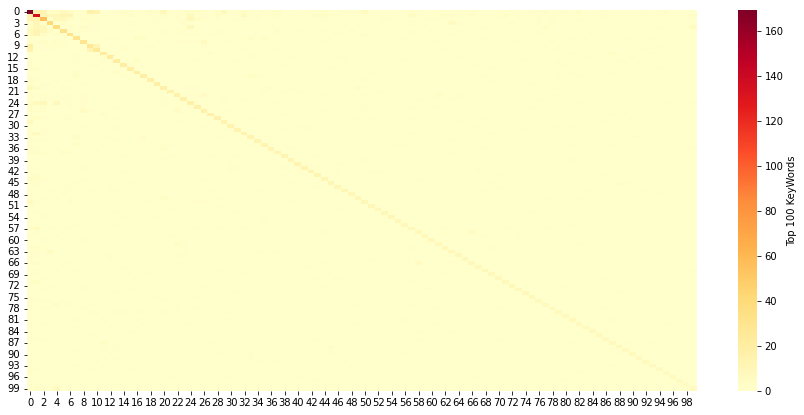

In [24]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.subplots(figsize=(15,7))
heat_map = sb.heatmap(df_ocurr, cmap='YlOrRd', cbar_kws={'label': 'Top 100 KeyWords'})
plt.show()

4. Para visualizar las relaciones de las palabras clave (cercanía), se puede reducir la dimensionalidad de la matriz de co-occurrencias a dos componentes usando SVD (o MSD), y graficar las palabras clave a partir de las coordenadas obtenidas. Un ejemplo se presenta a continuación (extraido del manual de usuario de T-LAB). El tamaño del texto es proporcional a la frecuencia de las palabras clave. Construya un gráfico similar a partir de la matriz de co-occurrencias que fue obtenida en el punto anterior.

In [25]:
from sklearn.preprocessing import StandardScaler


# StandardScaler: resta la media y luego divide por la desviaación estándar
X = StandardScaler().fit_transform(df_ocurr)

print(type(X))
print(X)


<class 'numpy.ndarray'>
[[ 9.7618554   0.96356391  1.91514761 ... -0.17438363 -0.18842229
  -0.21060471]
 [ 0.73948089  9.68326777  1.91514761 ... -0.17438363 -0.18842229
   3.1147328 ]
 [ 0.56257159  0.74373945  9.21727022 ... -0.17438363 -0.18842229
   0.89784113]
 ...
 [-0.2040354  -0.20883324 -0.2422977  ...  9.33745077  1.38176344
  -0.21060471]
 [-0.2040354  -0.20883324 -0.2422977  ...  1.4109221   9.23269211
  -0.21060471]
 [-0.2040354   0.01099122 -0.07634037 ... -0.17438363 -0.18842229
   6.4400703 ]]


In [26]:
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import FactorAnalysis
factorAnalysis = FactorAnalysis(
     n_components=2,
     max_iter=100,
     svd_method="randomized",
     random_state=0,
 )
X_factor = factorAnalysis.fit_transform(X)
fig = px.scatter(X_factor, x=X_factor[2:,0], y=X_factor[2:,1],text=df_res.columns[2:], title="Gráfico de Cercanía",height=1000)
fig.update_traces(textfont={"size":df_keyword[2:]})
fig.show()